In [1]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import colors
import numpy as np
from sklearn.model_selection import train_test_split
import pickle

In [2]:
data = load_iris()

In [3]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
df = pd.DataFrame(
    data=data.data,
    columns=data.feature_names
)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df['class'] = data.target

In [7]:
df['class'].unique()

array([0, 1, 2], dtype=int64)

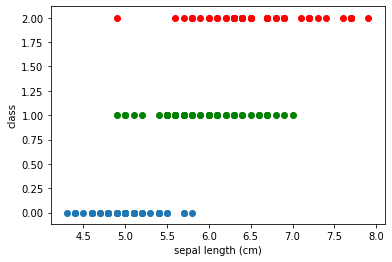

In [8]:
x0 = df.loc[lambda x: x['class'] == 0, ['sepal length (cm)']]
x1 = df.loc[lambda x: x['class'] == 1, ['sepal length (cm)']]
x2 = df.loc[lambda x: x['class'] == 2, ['sepal length (cm)']]
y0 = df.loc[lambda x: x['class'] == 0, ['class']]
y1 = df.loc[lambda x: x['class'] == 1, ['class']]
y2 = df.loc[lambda x: x['class'] == 2, ['class']]
plt.scatter(x0, y0)
plt.scatter(x1, y1, color='green')
plt.scatter(x2, y2, color='red')
plt.xlabel('sepal length (cm)')
plt.ylabel('class')
plt.show()

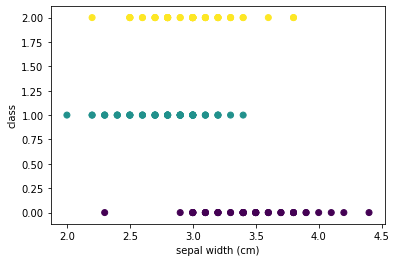

In [9]:
label = df['class']
x = df['sepal width (cm)']
y = df['class']
plt.scatter(x, y, c=label)
plt.xlabel('sepal width (cm)')
plt.ylabel('class')
plt.show()

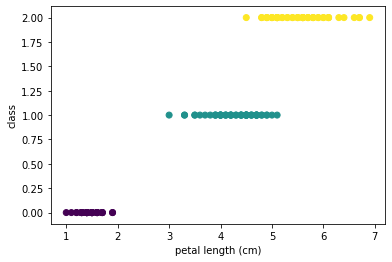

In [10]:
label = df['class']
x = df['petal length (cm)']
y = df['class']
plt.scatter(x, y, c=label)
plt.xlabel('petal length (cm)')
plt.ylabel('class')
plt.show()

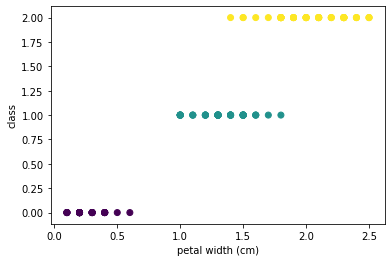

In [11]:
label = df['class']
x = df['petal width (cm)']
y = df['class']
plt.scatter(x, y, c=label)
plt.xlabel('petal width (cm)')
plt.ylabel('class')
plt.show()

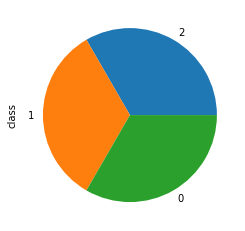

In [12]:
df['class'].value_counts().plot(kind='pie')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BD19D30>,
      dtype=object)

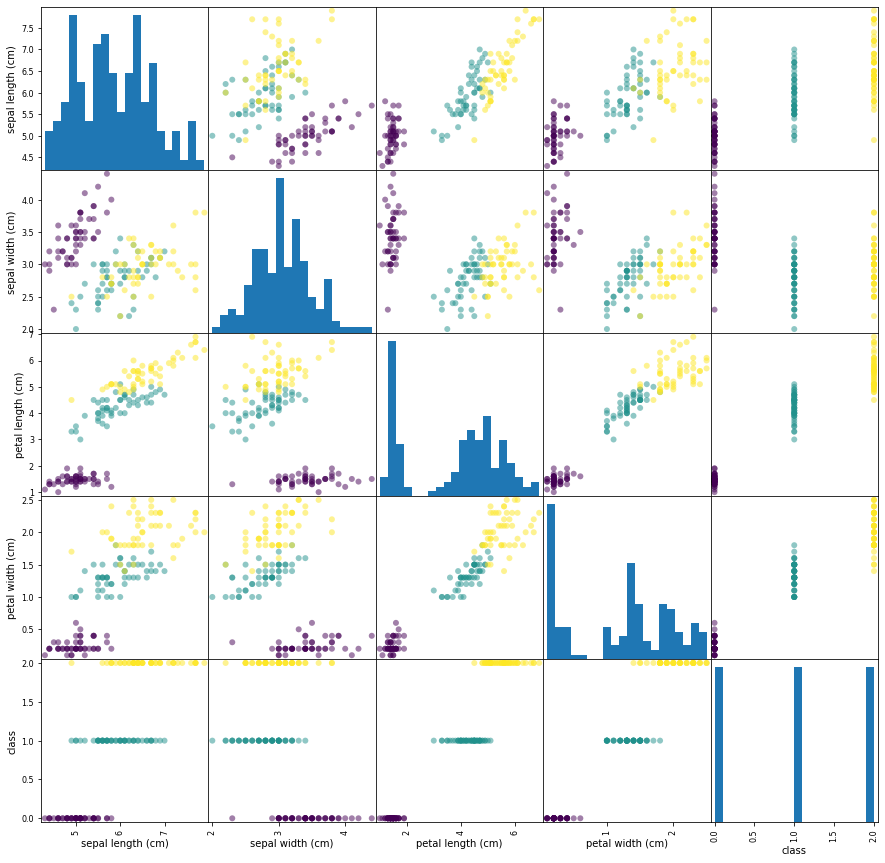

In [13]:
pd.plotting.scatter_matrix(df, c=df['class'], figsize=(15,15), marker='o', hist_kwds={'bins': 20})

In [14]:
svc = SVC()

In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(data['data'], data['target'], test_size=0.25, random_state=4)

In [16]:
svc.fit(xtrain, ytrain)

C:\ProgramData\Miniconda3\envs\myenv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [17]:
p = svc.predict(xtest)
p

array([2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1])

In [18]:
ytest

array([2, 0, 2, 2, 2, 1, 1, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1])

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
accuracy_score(p, ytest)

0.9736842105263158

In [21]:
svc = SVC(gamma=3, kernel='linear', degree=5, max_iter=150, probability=True, verbose=True)

In [22]:
xtrain, xtest, ytrain, ytest = train_test_split(data['data'], data['target'], test_size=0.19, random_state=4)
svc.fit(xtrain, ytrain)
p = svc.predict(xtest)
accuracy_score(p, ytest)

[LibSVM]

0.9655172413793104

In [23]:
svc.predict_proba(xtest)

array([[6.69783039e-03, 3.16032968e-03, 9.90141840e-01],
       [9.50678294e-01, 3.22907699e-02, 1.70309360e-02],
       [3.98022380e-03, 3.80605031e-03, 9.92213726e-01],
       [1.82413483e-03, 2.61272601e-04, 9.97914593e-01],
       [3.25433586e-03, 2.33009339e-03, 9.94415571e-01],
       [7.09761196e-03, 9.12855758e-01, 8.00466303e-02],
       [1.54404993e-02, 1.48221594e-01, 8.36337907e-01],
       [9.85489533e-01, 7.61357177e-03, 6.89689498e-03],
       [9.50704575e-01, 3.13486892e-02, 1.79467355e-02],
       [1.29966521e-02, 3.89891113e-01, 5.97112235e-01],
       [9.16488876e-01, 6.29926477e-02, 2.05184763e-02],
       [9.42044862e-01, 3.98631563e-02, 1.80919818e-02],
       [9.45199608e-01, 3.96639408e-02, 1.51364508e-02],
       [6.67443396e-03, 8.80242178e-01, 1.13083388e-01],
       [1.41420088e-02, 1.45993303e-02, 9.71258661e-01],
       [9.37233195e-01, 4.53551762e-02, 1.74116290e-02],
       [1.91692046e-02, 9.74437253e-01, 6.39354242e-03],
       [9.59806313e-01, 2.72190

In [24]:
svc.predict_log_proba(xtest)

array([[-5.00597163e+00, -5.75707893e+00, -9.90707346e-03],
       [-5.05795554e-02, -3.43297385e+00, -4.07272382e+00],
       [-5.52641723e+00, -5.57116329e+00, -7.81674542e-03],
       [-6.30664947e+00, -8.24994625e+00, -2.08758492e-03],
       [-5.72776706e+00, -6.06184693e+00, -5.60008047e-03],
       [-4.94799690e+00, -9.11773980e-02, -2.52514594e+00],
       [-4.17076140e+00, -1.90904687e+00, -1.78722553e-01],
       [-1.46167732e-02, -4.87782286e+00, -4.97668397e+00],
       [-5.05519111e-02, -3.46258282e+00, -4.02034705e+00],
       [-4.34306349e+00, -9.41887777e-01, -5.15650184e-01],
       [-8.72053493e-02, -2.76473726e+00, -3.88642951e+00],
       [-5.97023815e-02, -3.22230278e+00, -4.01228643e+00],
       [-5.63591480e-02, -3.22731280e+00, -4.19064948e+00],
       [-5.00947088e+00, -1.27558208e-01, -2.17962978e+00],
       [-4.25860556e+00, -4.22677962e+00, -2.91624601e-02],
       [-6.48231538e-02, -3.09323097e+00, -4.05061696e+00],
       [-3.95445022e+00, -2.58951510e-02

# Pick

In [25]:
file = 'iris.model'

In [26]:
pickle.dump(svc, open(file, 'wb'))